# Step1. 탐색: 데이터의 기초 정보 살펴보기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../data/drinks.csv'
drinks = pd.read_csv(file_path)
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [2]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [3]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


# Step2. 인사이트의 발견: 탐색과 시각화

### 참고: 상관 관계 분석
* 단순 상관 분석: 2개의 피처 간의 상관 계수를 계산
* 다중 상관 분석: 여러개의 피처 간의 연관성을 분석

### 두 피처 간의 상관 계수 구하기

In [4]:
# 맥주와 와인 간의 상관 계수
corr = drinks[['beer_servings','wine_servings']].corr(method='pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


### 여러 피처 간의 상관 관계 분석하기

In [5]:
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


### heatmap, pairplot 그래프로 시각화하기

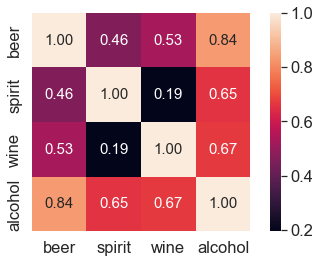

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_view = ['beer','spirit','wine','alcohol'] # 그래프에 들어갈 cols 이름 설정
sns.set(font_scale = 1.5) # 폰트 크기 설정

# 히트맵 생성
hm = sns.heatmap(corr.values,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels = cols_view,
                xticklabels = cols_view)

plt.tight_layout()
plt.show()

### 참고: heatmap 기본문법

* vmin, vmax: 색으로 표현할 값의 최솟값, 최댓값
* cbar: colorbar의 유무
* center: 중앙값 설정
* linewidths: 각 cell들 사이의 간격 조정
* annot: 각 cell의 값 표시
* annot_kws: 숫자의 크기를 조정
* square: cell을 정사각형으로 설정(False는 직사각형)
* fmt: 각 cell값의 데이터 형태 설정
* cmap: color palattes 설정
* tight_layout(): 사이즈 맞춤 조정

### 피처 간의 산점도 그래프 출력

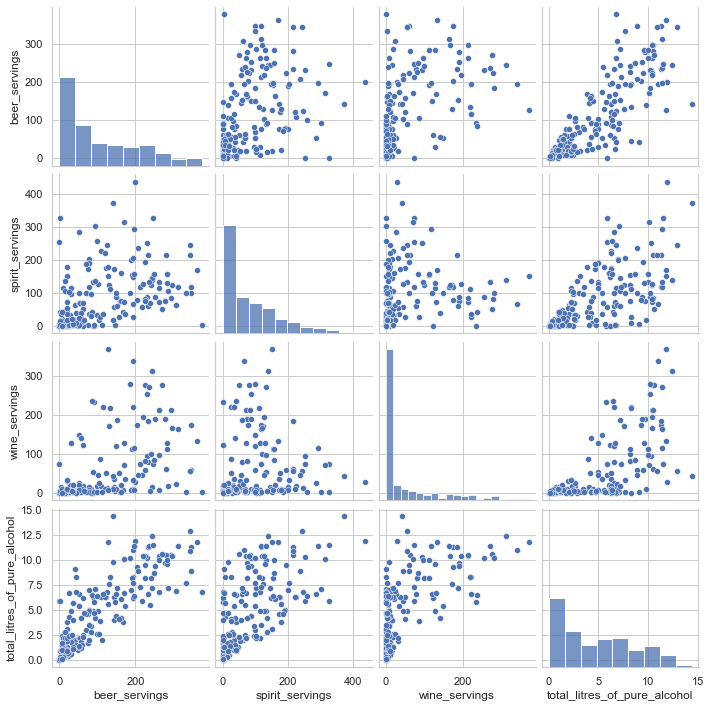

In [7]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']], height=2.5)
plt.show()

### 참고: seaborn 스타일 사용자 정의(style, context)

* https://hleecaster.com/python-seaborn-set-style-and-context/

# Step3. 탐색적 분석: 스무고개로 개념적 탐색 분석하기

### 결측 데이터 전처리하기

In [8]:
# continent 피처에 존재하는 결측 데이터를 'OT'로 통합
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


### 파이차트로 시각화하기: 대륙 결측치 비율

In [9]:
labels = drinks['continent'].value_counts().index.tolist()
labels

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [10]:
fracs = drinks['continent'].value_counts().values.tolist()
fracs

[53, 45, 44, 23, 16, 12]

In [11]:
explode = (0, 0, 0, 0.25, 0, 0)

* 파이차트 생성

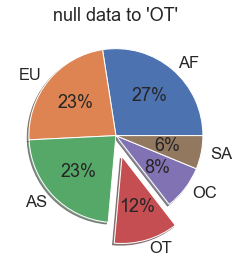

In [32]:
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True) # autopct: 부채꼴 안에 표시될 숫자 형식 지정
plt.title('null data to \'OT\'')
plt.show()

* 미니퀴즈 1번: value_counts()는 인덱스에 unique value들을, 값에 count를 저장해줌
* 미니퀴즈 2번: labels는 대륙의 이름들, fracs는 각 대륙별 개수
* 미니퀴즈 3번: explode는 부채꼴이 파이 차트의 중심에서 벗어나는 정도를 설정(0.25: 반지름의 25% 만큼 벗어나도록 설정)

### agg() 함수를 이용해 대륙별로 분석하기

* agg() 함수란?
        :그룹에 대한 여러가지 연산 결과를 동시에 얻을 수 있는 함수
          agg에 ['mean', 'min', 'max', 'sum'] 파라미터를 입력만 하면 한번에 다 계산해줌

In [13]:
# 대륙별 spirit_servings에 대한 통계
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


### 전체 평균보다 알코올을 많이 섭취하는 대륙 구하기

In [14]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
continent_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

### 평균 beer_servings가 가장 높은 대륙 구하기

In [15]:
# idxmax(): 시리즈 객체에서 값이 가장 큰 index 반환
beer_continent = drinks.groupby('continent')['beer_servings'].mean().idxmax()
beer_continent

'EU'

* 알코올을 평균보다 많이 섭취하는 대륙: EU, OT, SA
* 맥주를 가장 좋아하는 대륙: EU

### 시각화

#### 대륙별 Spirit Servnigs의 평균, 최소, 최대, 합계

In [16]:
# result: 대륙별 spirit_servings의 통계값
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


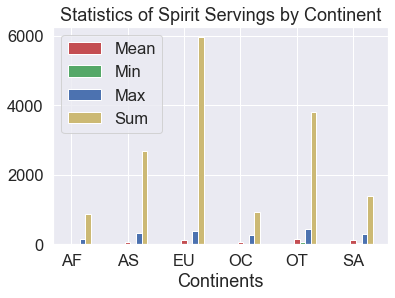

In [49]:
# 일반화시켜서 생각해보는 과정 필요
n_groups = len(result.index) # 6
index = np.arange(n_groups) # array([0, 1, 2, 3, 4, 5])
bar_width = 0.1

means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

# plt.bar(x, y, width, color, label)
rects1 = plt.bar(index, means, bar_width, color = 'r', label='Mean') 
rects2 = plt.bar(index+bar_width, mins, bar_width, color = 'g', label='Min')
rects3 = plt.bar(index+bar_width*2, maxs, bar_width, color = 'b', label='Max')
rects4 = plt.bar(index+bar_width*3, sums, bar_width, color = 'y', label='Sum')
# index에 bar_width만큼씩 더해주는 이유: 0.1씩 오른쪽으로 위치를 이동시켜주려고
# 각각의 rects를 언제 사용하는지?
# rects4[n_groups-1].set_color('r')

plt.xticks(index, result.index.tolist())
plt.xlabel('Continents')
plt.title('Statistics of Spirit Servings by Continent')
plt.legend()
plt.show()

### 미니퀴즈 1

다음의 각 코드가 의미하는 것은?
* means = result['mean'].tolist()
* mins = result['min'].tolist()
* maxs = result['max'].tolist()
* sums = result['sum'].tolist()



* 답: 대륙별 평균/최소/최대/합계 리스트

위 그래프에서 4개의 통계 종류를 나타내는 디자인 기능이 담긴 코드는?
* 답: plt.legend()

#### 대륙별 Pure Alcohol 평균 소비량

In [50]:
# continent_mean: 대륙별 알코올 평균
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [51]:
total_mean

4.717098445595855

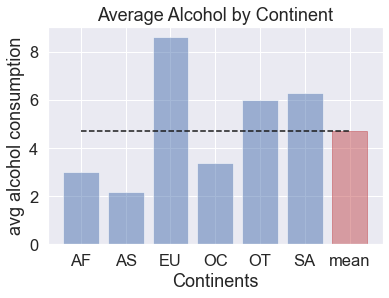

In [53]:
# x축작업
continents = continent_mean.index.tolist()
continents.append('mean') # ['AF', 'AS', 'EU', 'OC', 'OT', 'SA', 'mean']
x_pos = np.arange(len(continents)) # array([0, 1, 2, 3, 4, 5, 6])

# y축작업
alcohol = continent_mean.tolist()
alcohol.append(total_mean) # [3.0075471698113208, 2.1704545454545454, 8.617777777777778, 3.38125, 5.995652173913044, 6.308333333333334, 4.717098445595855]

# 막대그래프 생성
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5) # alpha: 투명도
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--") # ([x범위], [y범위],"점선색 및 종류")

plt.xticks(x_pos, continents)
plt.xlabel('Continents')
plt.ylabel('avg alcohol consumption')
plt.title('Average Alcohol by Continent')

plt.show()

### 미니퀴즈2

위 그래프에서 하나의 막대만 다르게 색상을 변경하는 코드는? 초록으로 바꿔보자.
* 답: bar_list[len(continents) - 1].set_color('g')


점선을 표현하는 부분의 코드는? 그리고 점선의 위치도 변경해보자.
* 코드: plt.plot([0., 6], [total_mean, total_mean], "k--")
* 변경한 코드: plt.plot([3., 5], [total_mean + 1.5, total_mean + 1.5], "k--")

#### 대륙별 Beer Servings 총량

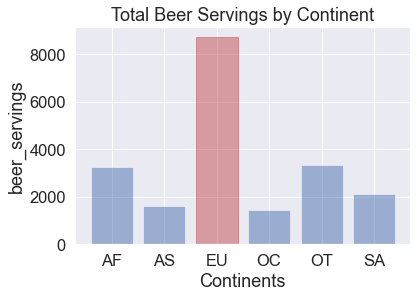

In [54]:
# 대륙별로 맥주 총량 계산
beer_group = drinks.groupby('continent')['beer_servings'].sum()

# x축 작업
continents = beer_group.index.tolist()
x_pos = np.arange(len(continents))

# y축 작업
alcohol = beer_group.tolist()
 
# 막대그래프 생성
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(x_pos, continents)
plt.xlabel('Continents')
plt.ylabel('beer_servings')
plt.title('Total Beer Servings by Continent')
 
plt.show()

### 미니퀴즈3

위 그래프에서 하나의 막대만 다르게 색상을 변경하는 코드는? 초록으로 바꿔보자.
* 답: bar_list[continents.index("EU")].set_color('g')

# Step4. 통계적 분석: 분석 대상간의 통계적 차이 검정하기

### t-test

* 모집단에 대한 정보를 모를 때, 현재 데이터만으로 두 집단의 차이에 대해 검정하는 방법
* 두 집단의 데이터 수가 비슷하며 정규분포를 따르는 경우에 신뢰도가 높은 방식

### 아프리카와 유럽 간의 맥주 소비량 차이 검정

In [21]:
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings']) # 두 집단의 분산이 같은 경우를 가정
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False) # 같지 않은 경우

print('The t-statistic and p-value assuming equal variances is %.3f and %.3f'%tTestResult)
print('The t-statistic and p-value not assuming equal variances is %.3f and %.3f'%tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


* p값 = 귀무 가설이 맞을 확률
* 분산이 같다고 가정한 경우와 다르다고 가정한 경우 모두 p값이 0.0000이하로 매우 낮으므로 귀무 가설이 일어날 확률이 매우 낮음
* 따라서 귀무가설 '두 집단의 평균이 같다'는 기각되고, 이에 따라 대립가설 '두 집단의 평균은 다르다'를 채택
* 따라서 '아프리카와 유럽 간의 맥주 소비량 차이'는 통계적으로 유의미하다는 결론
* 그러나 이번 케이스에서는 아프리카와 유럽이라는 두 집단의 데이터 크기도 다르고 크기 자체도 크지 않기 때문에 통계적으로 유의미하지 않다.

### 대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [22]:
# total_servings: 총 술 소비량
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# alcohol_rate: 총 술 소비량 대비 알코욜 비율
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# alcohol_rate를 가지고 순위 정보 생성
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0) # 내림차순
country_with_rank

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
...,...,...
103,Maldives,0.000000
97,Libya,0.000000
79,Iran,0.000000
90,Kuwait,0.000000


#### 시각화

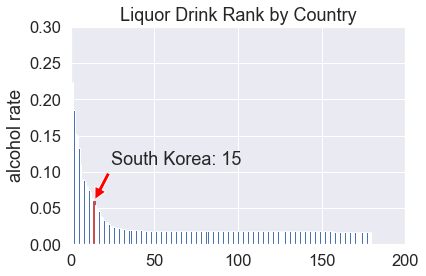

In [65]:
# x축 작업
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))

# y축 작업
rank = country_with_rank.alcohol_rate.tolist()

# 그래프 생성
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index('South Korea')].set_color('r')
plt.ylabel('alcohol rate')
plt.title('Liquor Drink Rank by Country')
plt.axis([0, 200, 0, 0.3]) # axis([xmin, xmax, ymin, ymax]) : x, y축 범위 지정 함수

korea_rank = country_list.index('South Korea')
korea_alc_rate = country_with_rank[country_with_rank['country']=='South Korea']['alcohol_rate'].values[0]
# 뒤에 values[0] 붙이는 이유? -> 값이 여러개 있는 경우 확실히 가져올 인덱스를 지정
plt.annotate('South Korea: ' + str(korea_rank+1),
             xy=(korea_rank, korea_alc_rate),
             xytext=(korea_rank+10, korea_alc_rate+0.05),
            arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

* plt.annotate() : 주석을 다는 함수
* plt.annotate('주석내용', xy=좌표위치, xytest=글자좌표위치, arrowprops=dict(화살표 특성 제어))
* arrowprops의 기능에 대해서는 다음 사이트에 상세히 나와 있음 (https://frhyme.github.io/python-lib/plt_arrowprops/)

# 연습문제

### 1. 대륙별 평균 wine_servings 구하기

In [67]:
avg_wine_by_continent = drinks.groupby('continent')['wine_servings'].mean()
df = avg_wine_by_continent.to_frame()
df

,wine_servings
continent,
AF,16.264151
AS,9.068182
EU,142.222222
OC,35.625000
OT,24.521739
SA,62.416667


### 2. 국가별 모든 servings 합 계산한 total_servings 피처 생성하기

In [25]:
drinks['total_servings']  = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']
drinks[['country', 'beer_servings', 'wine_servings', 'spirit_servings', 'total_servings']].head()

,country,beer_servings,wine_servings,spirit_servings,total_servings
0,Afghanistan,0,0,0,0
1,Albania,89,54,132,275
2,Algeria,25,14,0,39
3,Andorra,245,312,138,695
4,Angola,217,45,57,319


### 3. 전체 알코올 평균보다 적은 알코올을 마시는 대륙 중, spirit을 가장 많이 마시는 국가 구하기

In [26]:
total_mean = drinks['total_litres_of_pure_alcohol'].mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_under_mean = continent_mean[continent_mean <= total_mean].index.tolist()

continent_under_mean

['AF', 'AS', 'OC']

In [27]:
# 위에 해당하는 대륙만 필터링해서 df 생성
df = drinks.loc[drinks.continent.isin(continent_under_mean)]
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
2,Algeria,25,0,14,0.7,AF,39,0.017949
4,Angola,217,57,45,5.9,AF,319,0.018495
8,Australia,261,72,212,10.4,OC,545,0.019083
12,Bahrain,42,63,7,2.0,AS,112,0.017857
...,...,...,...,...,...,...,...,...
187,Vanuatu,21,18,11,0.9,OC,50,0.018000
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [28]:
most_spirit = df.loc[df['spirit_servings'].idxmax()]
most_spirit['country']

'Russian Federation'

### 4. 나라별 술 소비량 대비 알코올 비율 구하기

In [29]:
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)
drinks[['country', 'total_litres_of_pure_alcohol', 'total_servings', 'alcohol_rate']].head()

,country,total_litres_of_pure_alcohol,total_servings,alcohol_rate
0,Afghanistan,0.0,0,0.000000
1,Albania,4.9,275,0.017818
2,Algeria,0.7,39,0.017949
3,Andorra,12.4,695,0.017842
4,Angola,5.9,319,0.018495


### 5. 대륙별 술 소비량 대비 알코올 비율 구하기

In [68]:
continent_sum = drinks.groupby('continent').sum()
continent_sum['alcohol_rate_continent'] = continent_sum['total_litres_of_pure_alcohol'] / continent_sum['total_servings']
continent_sum[['total_litres_of_pure_alcohol', 'total_servings', 'alcohol_rate_continent']]

,total_litres_of_pure_alcohol,total_servings,alcohol_rate_continent
continent,,,
AF,159.4,4986,0.031970
AS,95.5,4706,0.020293
EU,387.8,21085,0.018392
OC,54.1,2940,0.018401
OT,137.9,7721,0.017860
SA,75.7,4227,0.017909
